<a href="https://colab.research.google.com/github/Charlie021/Optimizacion/blob/main/Fibonacci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

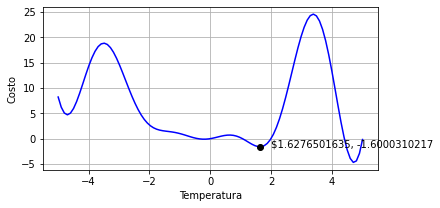

In [ ]:
def GraficarFuncionObjetivo():
    a,b = -5,5
    
    T = np.linspace(a, b, 100)
    U = (T*T+T)*np.cos(2*T)+T*T

    plt.figure(figsize=(6, 3))
    plt.plot(T, U, 'b')
    plt.plot(1.6276501635, -1.6000310217, 'ko')
    plt.annotate(r'$1.6276501635, -1.6000310217', (1.6276501635, -1.6000310217), (2, -1.6000310217))

    plt.xlabel("Temperatura")
    plt.ylabel("Costo")
    plt.grid()
    plt.show()
    
    return None

GraficarFuncionObjetivo()

In [ ]:
def U(T):
    return (T*T+T)*np.cos(2*T)+T*T

In [ ]:
def Fibonacci(*params):
    a   = params[0]
    b   = params[1]
    k   = params[2]
    it  = params[3]
    reg = params[4]
    L   = params[5]
    n   = params[6]
    fs  = params[7]
    ep  = params[8]

    i_arriba = n - k + 1 
    i_abajo = n + 1
    Lk = L*fs[i_arriba]/fs[i_abajo]

    xa = a + Lk
    xb = b - Lk

    U_xa = U(xa)
    U_xb = U(xb)

    if(U_xa > U_xb):
        a = xa
    else:
        b = xb
        
    if(np.abs(U_xa-U_xb) > ep):
        k = k + 1
        it = it + 1
        
        reg.append([it, xa, U_xa])
        print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(it, xa, U_xa))
    
        return Fibonacci(a, b, k, it, reg, L, n, fs, ep)
    else:
        print("-------------------------------------------------------")
        print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(it, xa, U_xa))
        
        return reg

In [ ]:
def RunFibonacci():
    n = 30
    
    fs = [1, 1]
    for i in range(n):
        aux = fs[-1] + fs[-2]
        fs.append(aux)
    
    a, b, k = -5, 5, 2
    L = b - a
    
    return Fibonacci(a, b, k, 0, [], b-a, n, fs, 1e-6)

In [ ]:
reg = RunFibonacci()

It: 01 - Temp: -1.1803398875 - Costo: 1.2420122373
It: 02 - Temp: 1.1803398875 - Costo: -0.4347106976
It: 03 - Temp: 0.2786404500 - Costo: 0.3800148338
It: 04 - Temp: 1.1803398875 - Costo: -0.4347106976
It: 05 - Temp: 1.7376207875 - Costo: -1.4752924898
It: 06 - Temp: 1.5247584250 - Costo: -1.5084513878
It: 07 - Temp: 1.3932022500 - Costo: -1.1850841385
It: 08 - Temp: 1.5247584250 - Costo: -1.5084513878
It: 09 - Temp: 1.6060646125 - Costo: -1.5956566237
It: 10 - Temp: 1.5750084125 - Costo: -1.5748645050
It: 11 - Temp: 1.6060646125 - Costo: -1.5956566237
It: 12 - Temp: 1.6252584000 - Costo: -1.5999722110
It: 13 - Temp: 1.6179270250 - Costo: -1.5991237881
It: 14 - Temp: 1.6252584000 - Costo: -1.5999722110
It: 15 - Temp: 1.6297894376 - Costo: -1.5999918435
It: 16 - Temp: 1.6280587373 - Costo: -1.6000302505
It: 17 - Temp: 1.6269891003 - Costo: -1.6000255743
It: 18 - Temp: 1.6280587373 - Costo: -1.6000302505
-------------------------------------------------------
It: 18 - Temp: 1.6276501635

In [ ]:
def Evaluacion(reg):
    reg1 = np.array(reg)
    fig, axs = plt.subplots(1,2, figsize=(15, 4))

    fig.suptitle('Convergencia')

    axs[0].axhline(55.08, color='k' , linewidth=3, linestyle='--')
    axs[0].plot(reg1[:, 0], reg1[:,1], linewidth=4)
    axs[0].set_xlabel('Iteraciones')
    axs[0].set_ylabel('Temperatura')
    axs[0].grid()
    axs[0].set_xlim([0, 15])

    axs[1].axhline(1225.17, color='k' , linewidth=3, linestyle='--')
    axs[1].plot(reg1[:, 0], reg1[:,2], linewidth=4)
    axs[1].set_xlabel('Iteraciones')
    axs[1].set_ylabel('Costo')
    axs[1].grid()
    axs[1].set_xlim([0, 15])

    plt.show()
    
    return None

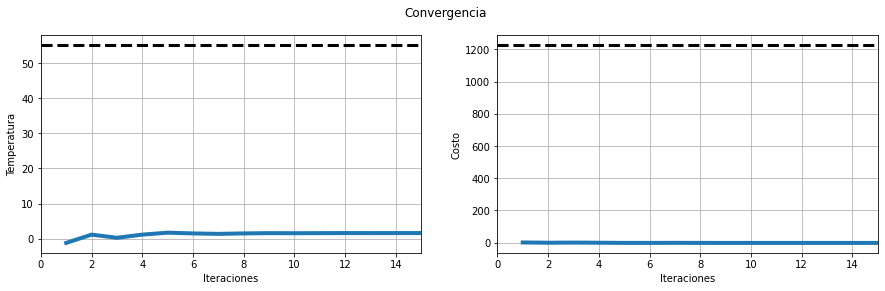

In [ ]:
Evaluacion(reg)